# Casualties data Preprocessing

### The following sources have been used:

Casualties data: https://data.gov.uk/dataset/road-accidents-safety-data

In [1]:
'''
RTA Casualties file creation

'''
import pandas as pd
import glob
import os
import time

###print(os.getcwd())

start_time0 = time.time()

# file i/o
csv_loader ='Specs/Casualties_FLM.csv'
csv_in = 'Data/Casualties_2015.csv'
csv_out = 'Data/Casualties.csv'

#load field name mapper
pfl = pd.read_csv(csv_loader, low_memory=False)
pc_cols_rename = dict(pfl[['field_name','field_descriptor']].where(pfl['import']=='Y').dropna().values.tolist())
pc_cols_drop = pfl['field_name'].where(pfl['import']=='N').dropna().values.tolist()

#load Casualties file
Casualties = pd.read_csv(csv_in,low_memory=False)

#clean up data
Casualties.drop(pc_cols_drop, axis=1, inplace=True)
Casualties.rename(columns=pc_cols_rename, inplace=True)
###postcodes.drop_duplicates()
###postcodes.info()

#save for later
try:
    Casualties.to_csv(csv_out, index=False)
except IOError as (errno, strerror):
    print 'I/O error({0}): {1}'.format(errno, strerror)
    if errno == 13:
        print '*** check to see if (someone has) file already open ***'
except:
    print "Unexpected error:", sys.exc_info()[0]
    raise
    
print "Casualties dataload: %s seconds " % (time.time() - start_time0)

Casualties dataload: 0.897000074387 seconds 


In [2]:
'''
RTA Casulties load

'''
import pandas as pd
import os
import time

print(os.getcwd())

#Load Casualties data
csv_in = 'Data/Casualties.csv'
Casualties = pd.read_csv(csv_in)


C:\GA\RTA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186189 entries, 0 to 186188
Data columns (total 7 columns):
accident_index          186189 non-null object
vehicle_reference       186189 non-null int64
casualty_reference      186189 non-null int64
casualty_class          186189 non-null int64
sex_of_casualty         186189 non-null int64
age_of_casualty         186189 non-null int64
age_band_of_casualty    186189 non-null int64
dtypes: int64(6), object(1)
memory usage: 9.9+ MB
None


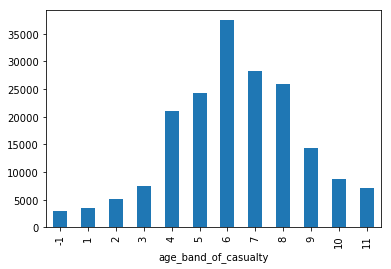

In [3]:
'''
RTA Casualties check data

'''

import matplotlib.pyplot as plt
%matplotlib inline

# check data
print(Casualties.info())
col = 'age_band_of_casualty'
Casualties.groupby([col])[col].count().plot(kind='bar')
plt.show()

#print(Casualties.groupby([col])[col].count())